In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")

In [2]:
X = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]
])
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [4]:
def calculate_mse(y_true: np.array, y_pred: np.array) -> float:
    """
    Вычисление значение метрики MSE (Mean-Squared-Error).

    Parameters
    ----------
    y_true: np.array
        Вектор истинных ответов.

    y_pred: np.array
        Вектор прогнозов.

    Returns
    -------
    score: float
        Значение метрики качества.

    """
    assert len(y_true) == len(y_pred)
    score = np.mean(np.square(y_true - y_pred))

    return score

def fit_linear_model(X: np.array,
                     y: np.array,
                     learning_rate: float = 0.01,
                     n_iters: int = 100000,
                     tol: float = 1e-5):
    """
    Обучение линейной регрессии алгоритмом градиентного спуска.

    Parameters
    ----------
    X: np.array
        Матрица признаков для обучения.

    y: np.array
        Вектор целевой переменной для обучения.

    learning_rate: float, optional, default = 0.01
        Скорость обучения. Опциональный параметр, по
        умолчанию, равен 0.01.

    n_iters: int, optional, default = 1000
        Количество итераций обучения. Опциональный параметр,
        по умолчанию, равен 1000.

    tol: float, optional, default = 1e-5
        Минимальное значимое изменение ошибки, при котором
        обучение продолжается. Если изменение ошибки на соседних
        итерациях меньше указанной величины, то обучение прекращается.

    Returns
    -------
    weights: np.array
        Вектор весов линейной модели.

    weights_history: List[np.array]
        Список с векторами весов на каждой итерации обучения.

    errors_history: List[float]
        Список со значением ошибки на каждой итерации обучения.

    """
    weights = np.random.randn(X.shape[0])
    errors_history, weights_history = [], [weights]

    for n_iter in range(n_iters):
        y_pred = np.dot(weights, X)
        current_error = calculate_mse(y, y_pred)
        weights = weights - 2*learning_rate*np.sum(X*(y_pred - y), axis=1)/len(y_pred)
        # weights = weights - 2*learning_rate*np.dot(X, (y_pred-y))/len(y_pred)
        errors_history.append(current_error)
        weights_history.append(weights)

        if n_iter > 2 and np.abs(current_error - errors_history[-2]) < tol:
            break
        
    return weights, weights_history, errors_history

def plot_fit_history(weights_history: np.array,
                     errors_history: np.array,
                     figsize=(15, 5)) -> None:
    """
    Визуализация процесса обучения линейной модели: визуализация
    изменения значения ошибки на каждой итерации обучения и
    визуализация изменения значения весов на каждой итерации
    обучения.

    Parameters
    ----------
    weights_history: List[np.array]
        Список с векторами весов на каждой итерации обучения.

    errors_history: List[float]
        Список со значением ошибки на каждой итерации обучения.

    figsize: Tuple[int, int], optional, default = (15, 5)
        Размер изображения графика. Опциональный параметр,
        по умолчанию равен (15, 5).

    """
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(
        f"Optional rounds: {len(errors_history)}, Error: {round(errors_history[-1], 2)}",
        size=15
    )
    plt.subplot(121)
    plt.plot(errors_history, linewidth=3)
    plt.xlabel("n_iterations", size=15)
    plt.ylabel("MSE", size=15)

    plt.subplot(122)
    plt.plot(weights_history, linewidth=3)
    plt.legend([f"$w_{i}$" for i in range(len(weights_history[0]))], loc="best", fontsize=15)
    plt.xlabel("n_iterations", size=15)
    plt.ylabel("w", size=15)

learning_rate = 0.1, n_iterations = 100000
learning_rate = 0.01, n_iterations = 100000
learning_rate = 0.001, n_iterations = 100000
learning_rate = 0.0001, n_iterations = 100000


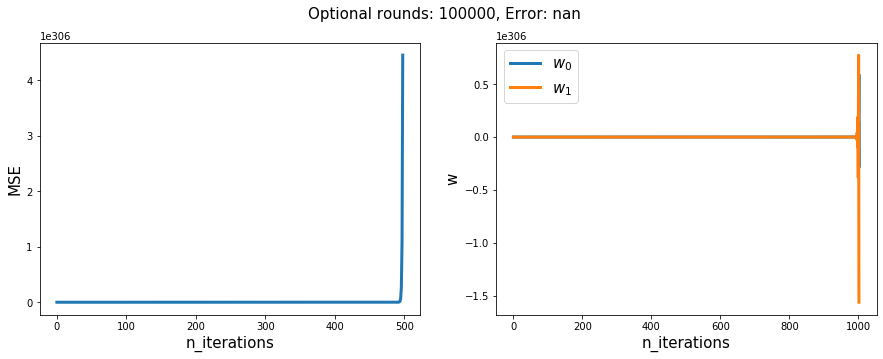

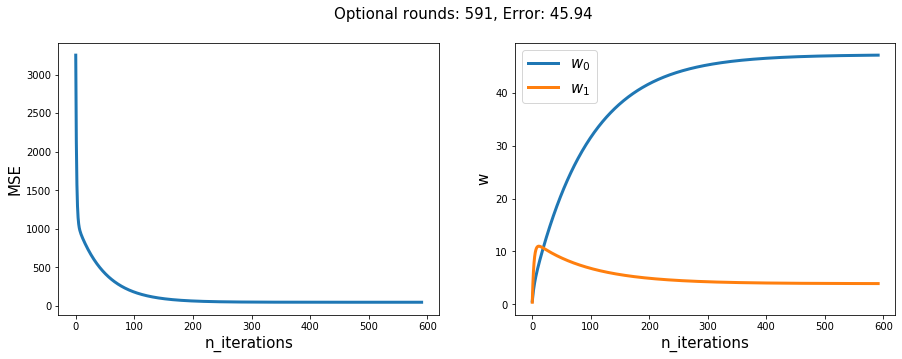

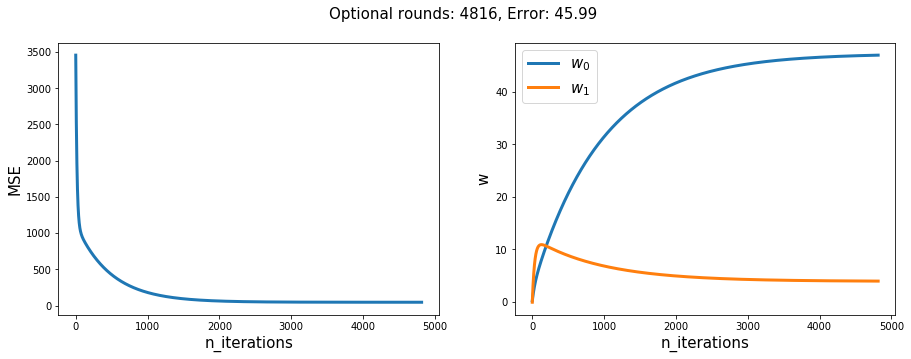

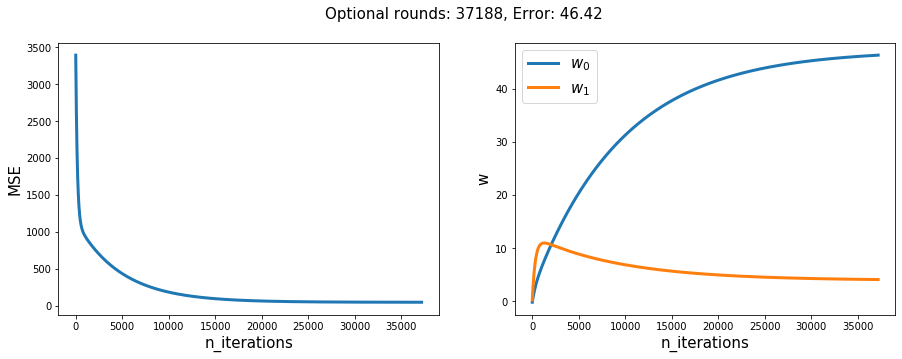

In [160]:
np.random.seed(27)
parameters_grid = [
    (0.1, 100000), (0.01, 100000), (0.001, 100000), (0.0001, 100000)
]
for learning_rate, n_iterations in parameters_grid:
    print(f"learning_rate = {learning_rate}, n_iterations = {n_iterations}")
    weights, weights_history, errors_history = fit_linear_model(
        X, y, learning_rate=learning_rate, n_iters=n_iterations
    )
    plot_fit_history(weights_history, errors_history)